In [2]:
!pip install yfinance



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [5]:
start = '1998-1-1'
end = datetime.now().strftime('%Y-%m-%d')
df = yf.download('AAPL', start=start, end=end)

df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-01-02,0.121652,0.145089,0.120536,0.145089,0.122989,718110400
1998-01-05,0.147321,0.147879,0.135603,0.141741,0.120151,651873600
1998-01-06,0.142299,0.178571,0.131696,0.169085,0.143330,1812473600
1998-01-07,0.167969,0.169643,0.154576,0.156250,0.132450,1041622400
1998-01-08,0.155692,0.166295,0.151228,0.162388,0.137653,774020800


In [6]:
df =df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-01-02,0.121652,0.145089,0.120536,0.145089,0.122989,718110400
1,1998-01-05,0.147321,0.147879,0.135603,0.141741,0.120151,651873600
2,1998-01-06,0.142299,0.178571,0.131696,0.169085,0.143330,1812473600
3,1998-01-07,0.167969,0.169643,0.154576,0.156250,0.132450,1041622400
4,1998-01-08,0.155692,0.166295,0.151228,0.162388,0.137653,774020800


In [7]:

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-01-02,0.121652,0.145089,0.120536,0.145089,0.122989,718110400
1,1998-01-05,0.147321,0.147879,0.135603,0.141741,0.120151,651873600
2,1998-01-06,0.142299,0.178571,0.131696,0.169085,0.143330,1812473600
3,1998-01-07,0.167969,0.169643,0.154576,0.156250,0.132450,1041622400
4,1998-01-08,0.155692,0.166295,0.151228,0.162388,0.137653,774020800


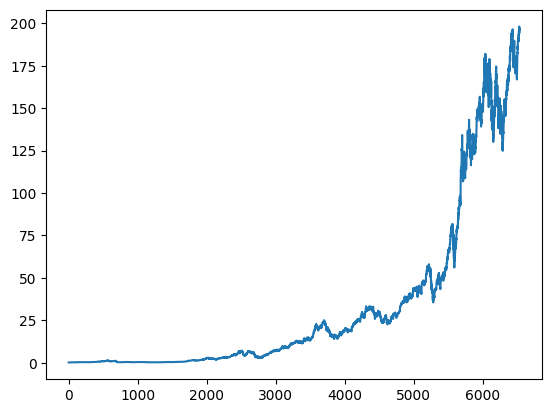

In [8]:
plt.plot(df.Close)

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
6531    181.745801
6532    181.772501
6533    181.783601
6534    181.767401
6535    181.758101
Name: Close, Length: 6536, dtype: float64

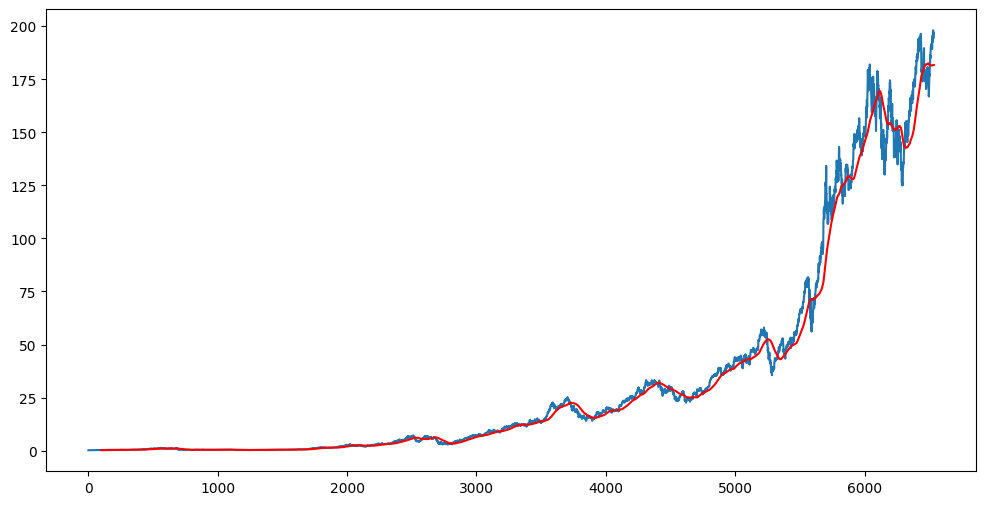

In [10]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
6531    177.56900
6532    177.79330
6533    178.00885
6534    178.22500
6535    178.43405
Name: Close, Length: 6536, dtype: float64

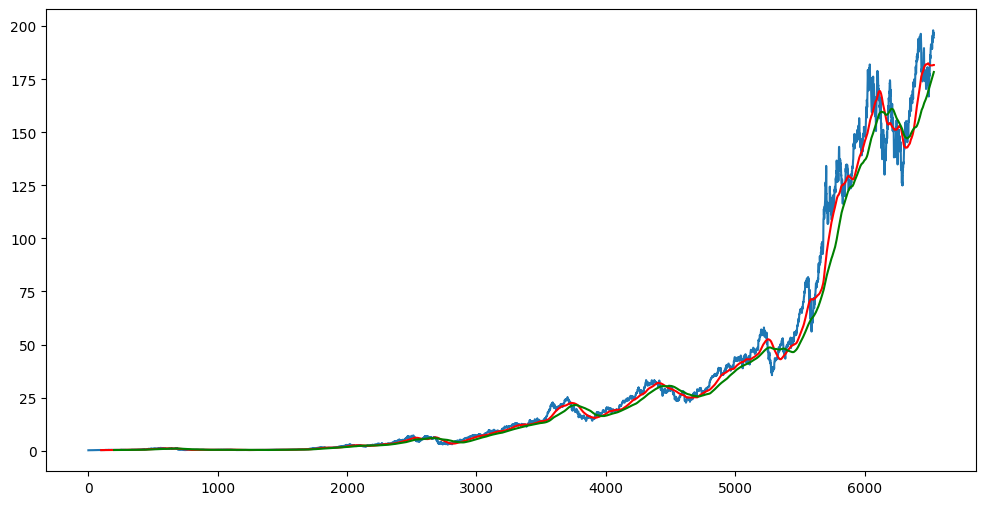

In [12]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(4575, 1)
(1961, 1)


In [14]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.01123040e-04],
       [0.00000000e+00],
       [8.25896744e-04],
       ...,
       [7.64937827e-01],
       [7.58594969e-01],
       [7.59274587e-01]])

In [16]:
x_train=[]
y_train = []
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [17]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [18]:
from keras.engine import sequential
model = Sequential()
model.add(LSTM(units = 50 ,activation = 'relu', return_sequences = True,input_shape =(x_train.shape[1],1) ))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 ,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 ,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 ,activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs =10)

Epoch 1/10
140/140 [==============================] - 33s 188ms/step - loss: 0.0023
Epoch 2/10
140/140 [==============================] - 35s 250ms/step - loss: 0.0026
Epoch 3/10
140/140 [==============================] - 44s 318ms/step - loss: 0.0023
Epoch 4/10
140/140 [==============================] - 42s 302ms/step - loss: 0.0021
Epoch 5/10
140/140 [==============================] - 25s 179ms/step - loss: 0.0021
Epoch 6/10
140/140 [==============================] - 25s 179ms/step - loss: 0.0022
Epoch 7/10
140/140 [==============================] - 25s 179ms/step - loss: 0.0020
Epoch 8/10
140/140 [==============================] - 25s 178ms/step - loss: 0.0021
Epoch 9/10
140/140 [==============================] - 25s 179ms/step - loss: 0.0020
Epoch 10/10
140/140 [==============================] - 25s 179ms/step - loss: 0.0022


In [22]:
model.save('keras_model.h5')

In [23]:
past_100_days = data_training.tail(100)

In [24]:
final_df =past_100_days.append(data_testing,ignore_index = True)

C:\Users\ELITE\AppData\Local\Temp\ipykernel_6744\547952303.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df =past_100_days.append(data_testing,ignore_index = True)


In [25]:
final_df.head()

,Close
0,27.965000
1,27.760000
2,27.932501
3,28.442499
4,28.440001


In [26]:
input_data = scaler.fit_transform(final_df)
input_data


array([[0.03065091],
       [0.02948299],
       [0.03046576],
       ...,
       [0.99333429],
       [0.98131321],
       [0.98045858]])

In [27]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])
  

In [28]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1961, 100, 1)
(1961,)


In [29]:
y_predicted = model.predict(x_test)


62/62 [==============================] - 4s 55ms/step


In [30]:
y_predicted.shape

(1961, 1)

In [31]:
scaler.scale_

array([0.00569719])

In [32]:
scaler_factor = 1/0.00717991
y_predicted = y_predicted*scaler_factor
y_test = y_test*scaler_factor

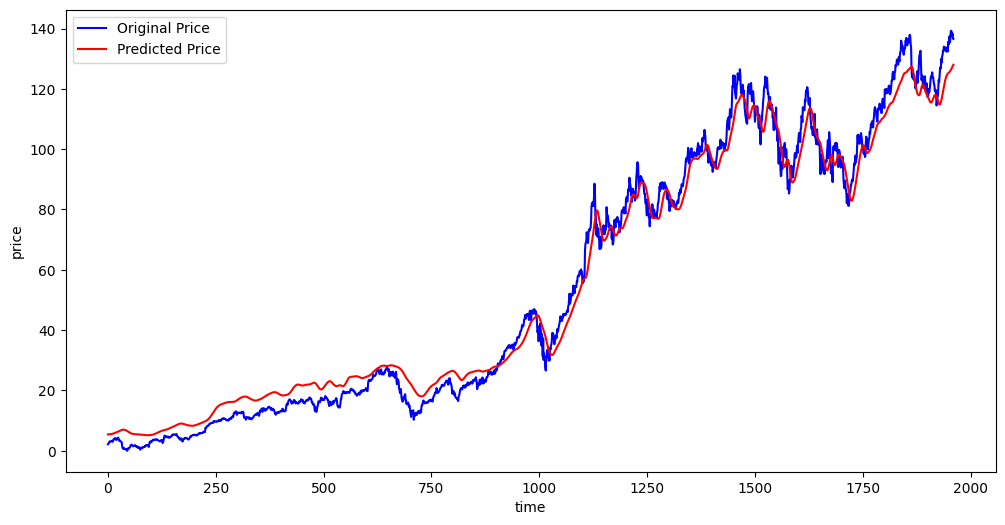

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

# New Section